<a id="top"></a>
# **8.2 Reinforced beam - ultimate and serviceability state**

<div style="background-color:lightgray;text-align:left"> <img src="../icons/start_flag.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Starting point</b> </div> 

The efficient structural analysis method described in the notebook [8.2](.../8_1_rc_beam_mkapa.ipynb#top) gives us the possibility to illuminate some important differences between the steel- and carbon-concrete bending behavior.   

<div style="background-color:lightgray;text-align:left"> <img src="../icons/destination.png" alt="Previous trip" width="50" height="50">
    &nbsp; &nbsp; <b>Where are we heading</b> </div> 

We shift our focus from analysis to design. With the knowledge of the material behavior we can now devise procedures that allow us to reproduce the design codes. Moreover, they allow us to look behind the scenes and explain what is the logic behind design formulas. This is rather important to avoid black box designs. With the understanding of the background, it is easier to verify the plausibility of assessment reports and avoid errors by cross checking. 

# **Load deflection curve of RC beam**

While the finite-element numerical simulation of a notched bended beam exhibited a peak load with a crack propagation along a single ligament, in reinforced concrete beam, multiple distributed cracking along the tensile zone is developing.

In [1]:
%matplotlib widget

In [2]:
from bmcs_cross_section.api import \
    MKappa, TShape, ReinfLayer, BarLayer
from bmcs_beam.api import BoundaryConditions, BoundaryConfig, \
    DeflectionProfile

The `DeflectionProfile` model component uses the moment-curvature relation to 
 - identify the ultimate moment capacity $M_\mathrm{uk}$ of a cross section
 - based on $M_\mathrm{uk}$ the characteristic ultimate load $F_\mathrm{uk}$ can 
   be identified
 - considering a load level the range $F \in (0, F_\mathrm{uk})$, the double integration of the curvature
   $\kappa(M)$ is performed to obtain the deflection lines $w(x)$, where $M \in (0, M_\mathrm{uk})$.
 - For each load level $F$, the corresponding deflection is obtained as $w_F = \max_x(w(x)) $

In [3]:
dp = DeflectionProfile()
bl1 = BarLayer(name='rebar 1', z=20, ds=16, count=2, matmod='steel')
bl1.matmod_.trait_set(E=200000, f_t=500)
dp.mc.high_kappa=0.0001
dp.mc.cross_section_layout.add_layer(bl1)
dp.mc.cross_section_shape_.trait_set(H=100, B=300)
dp.interact()

# **Modify the design**

Apparently, the presented design is not economic. The maximum allowable deflection is reached at the load of 5 kN while the ultimate failure is achieved at the level of 27 kN. Thus, the load range above 5 kN is useless.

How to achieve a more economic design? 
 - By reducing the amount of reinforcement, we reduce the ultimate load. The beam stiffness does not change significantly. Therefore, the design becomes more economic.
 - By changing the cross-sectional height or width, more precisely, the L/d, i.e. the slenderness 
 - By changing the cross sectional shape

## T-shape cross section

In [4]:
dp = DeflectionProfile()
bl1 = BarLayer(name='rebar 1', z=20, ds=16, count=2, matmod='steel')
bl1.matmod_.trait_set(E=200000, f_t=500)
dp.mc.high_kappa=0.0001
dp.mc.cross_section_layout.add_layer(bl1)
dp.mc.cross_section_shape='T-shape'
dp.mc.cross_section_shape_.trait_set(H=220, B_f=300, B_w=60, H_w=150)
dp.interact()

## SLS, ULS and partial safety factors 

Note that in the above example, we used the characteristic values of the material parameters, i.e. the mean values of the concrete strength $f_\mathrm{cc,k} = E_\mathrm{cc} \varepsilon_\mathrm{cy}$ and steel yielding stress $f_\mathrm{sy,k}$. The usage of mean material characteristic is correct for the calculation of deflections which are needed for the assessment of serviceability limit. The serviceability limit state (SLS) design for a beam deflection is set to 
$$
w_\max = \dfrac{L}{250}
$$

On the other hand, the ultimate design load has to be calculated, considering the uncertainty on the material parameters. The concept used in the design codes is based on the so called partial safety factors which reduce the material strength by a prescribed amount. The partial safety factor prescribed for the reduction steel yielding stress $\gamma_\mathrm{s} = 1.15$ and for concrete $\gamma_\mathrm{c} = 1.5$.

# **Get behind the formulas in the design codes**

The above studies show three possible situations:
1. ULS is reached before the SLS
1. ULS is reached simultaneously with the SLS
1. ULS is reached after the SLS

The second configuration represents an economic design with a full exploitation of the 
reinforcement in the SLS. To avoid a repeated calculation for any new beam geometry, the design codes provide a support in terms of the relation between beam slenderness and the reinforcement ratio.

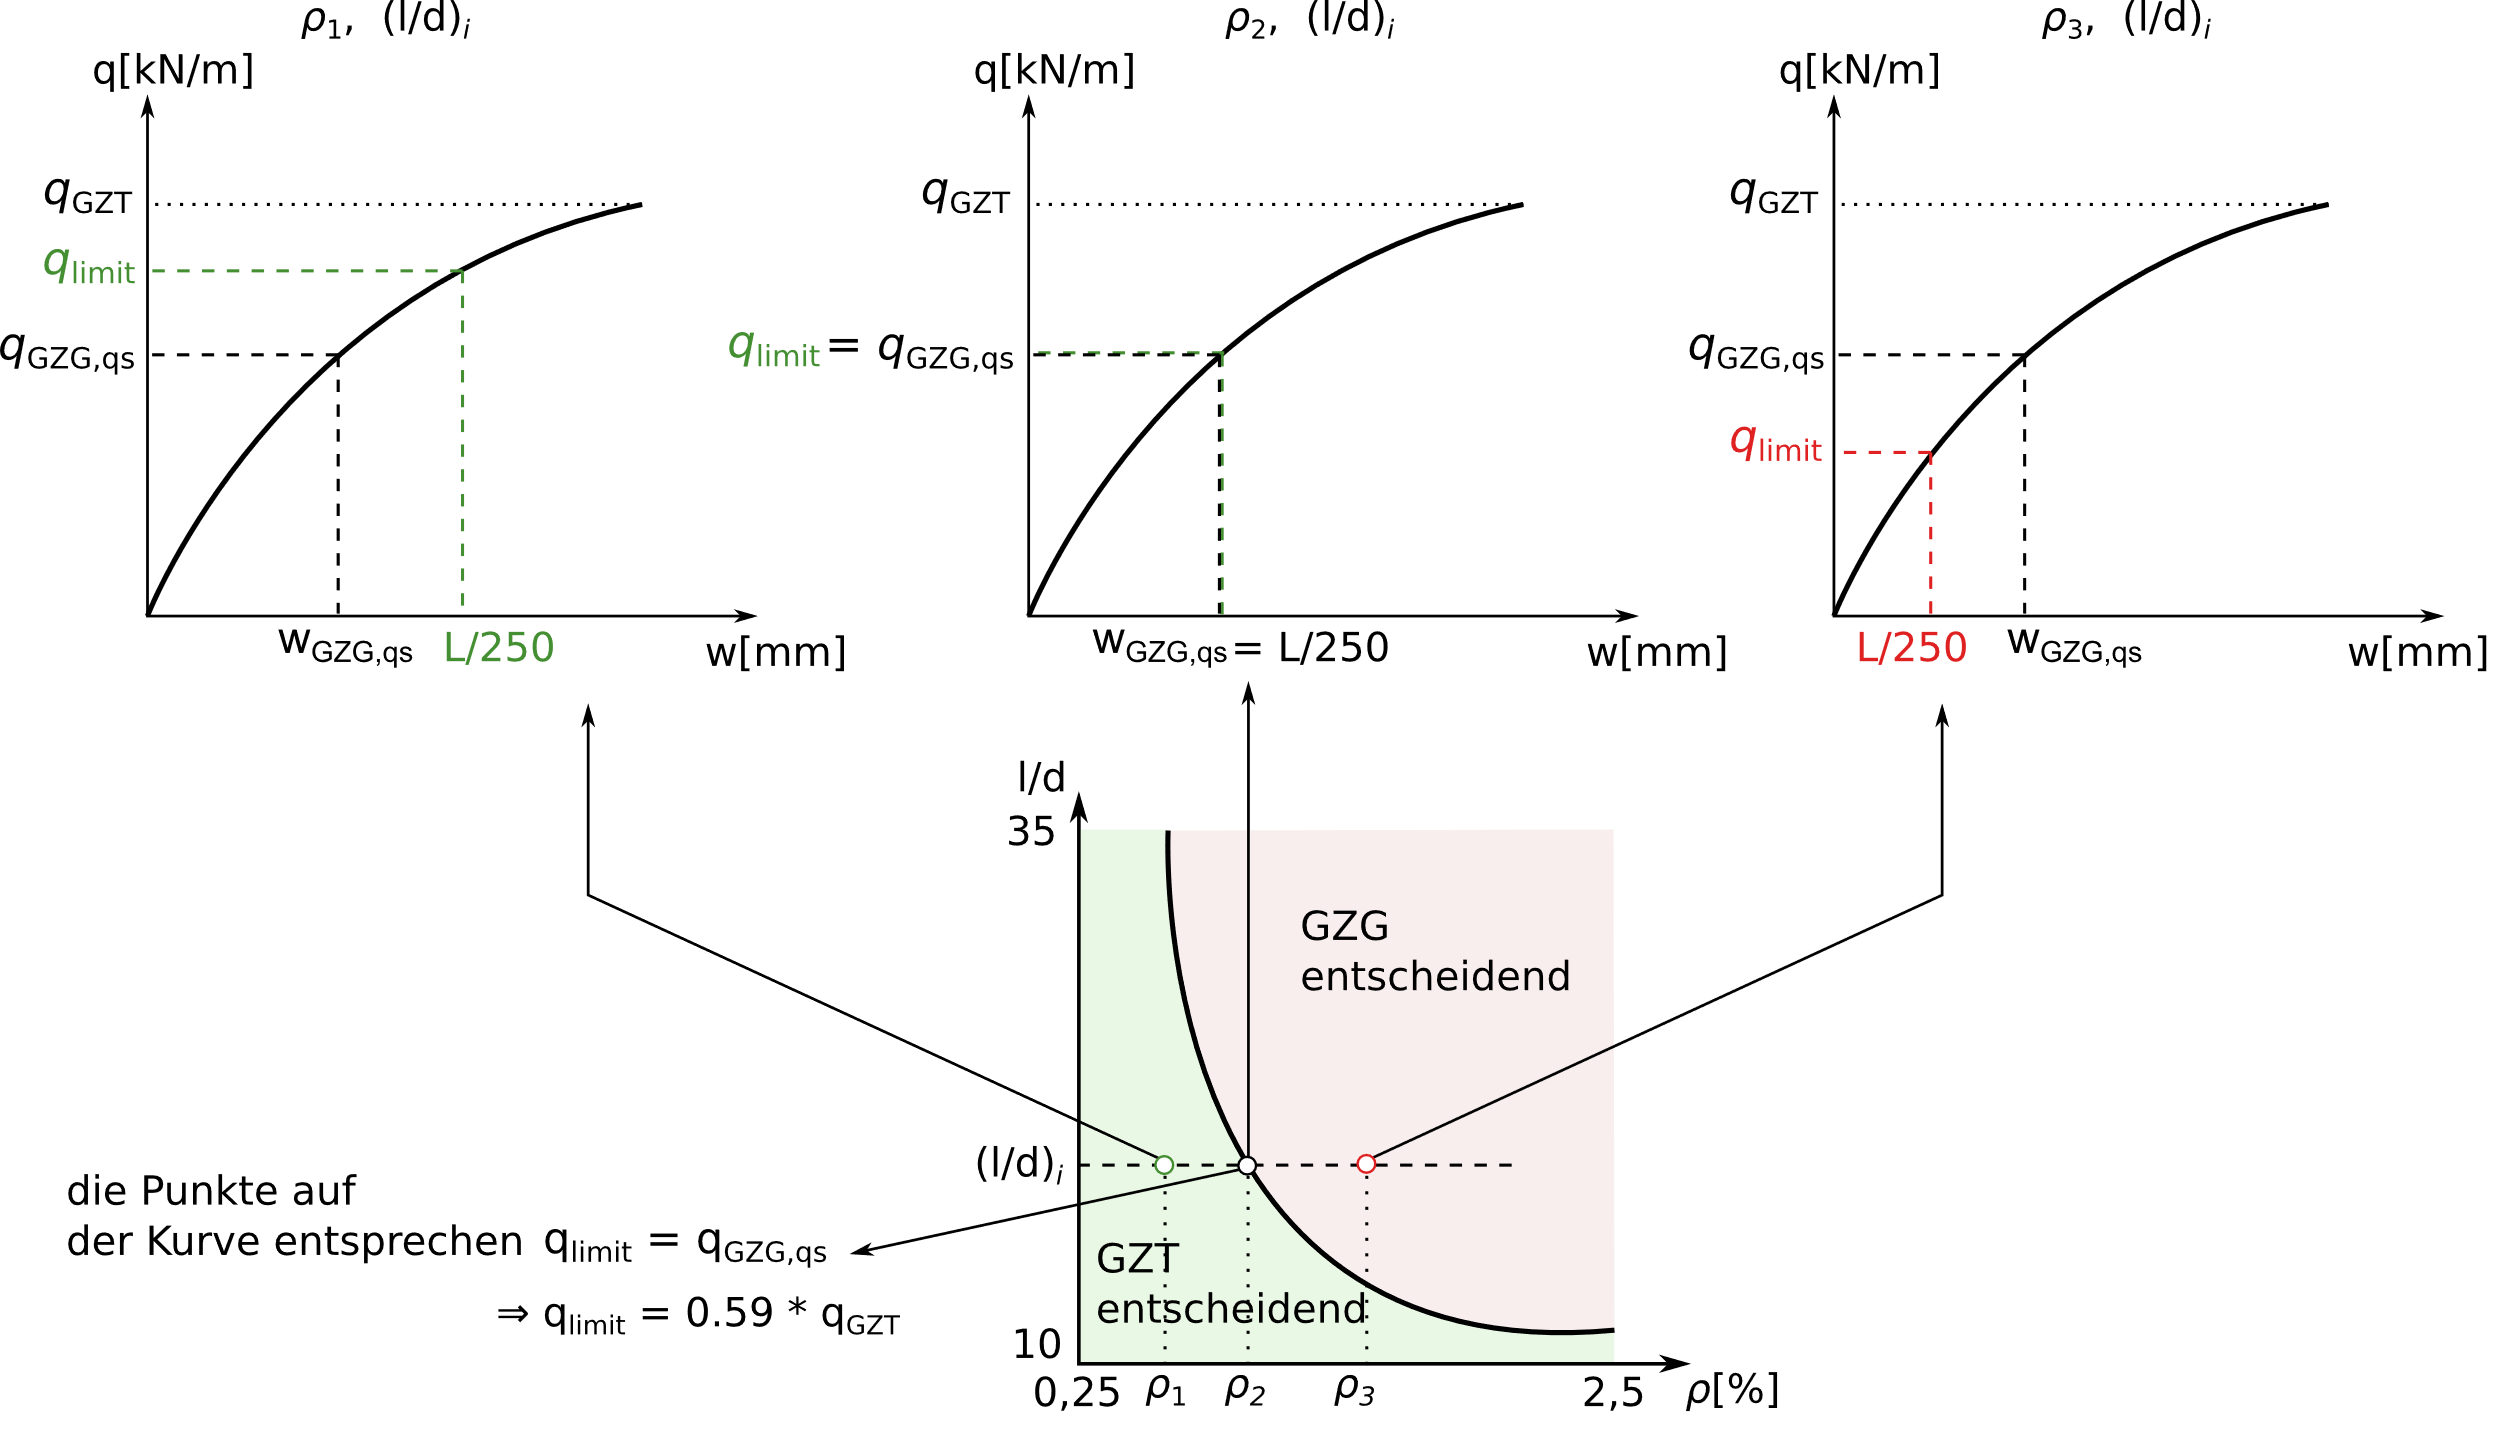

These curves have been setup using experimental results and approximate formulas representing the stress distribution over the cross section in the ultimate state.

The above examples show the possibility to evaluate the nonlinear structural behavior within miliseconds. They can be used to reproduce the design formulas used in engineering practice. In particular, the SLS assessment of RC beams is performed using the plot of the beam slenderness versus reinforcement ratio. 

The figure below shows the snapshot from EC2 showing the dashed curves where the ULS and SLS criteria correspond to the same value of allowable load. 

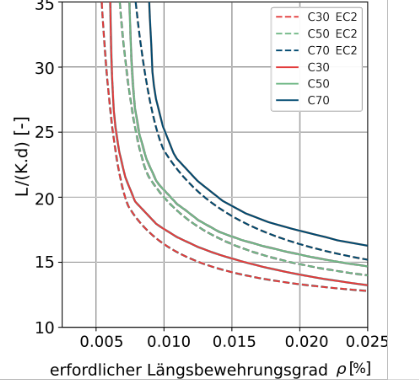

The solid curves show the results of the parametric study produced using the above described model. This study shows that the described approach is capable of capturing the currently used design codes.

Due to the general nature of the model, we can use it to derive a design rule for the carbon concrete reinforced cross section as well.

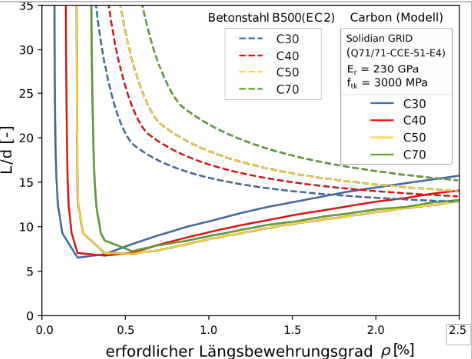

One can see that the curve representing the design with an equal SLS and ULS is significantly lower compared to the steel reinforced concrete. What is the source of this difference.

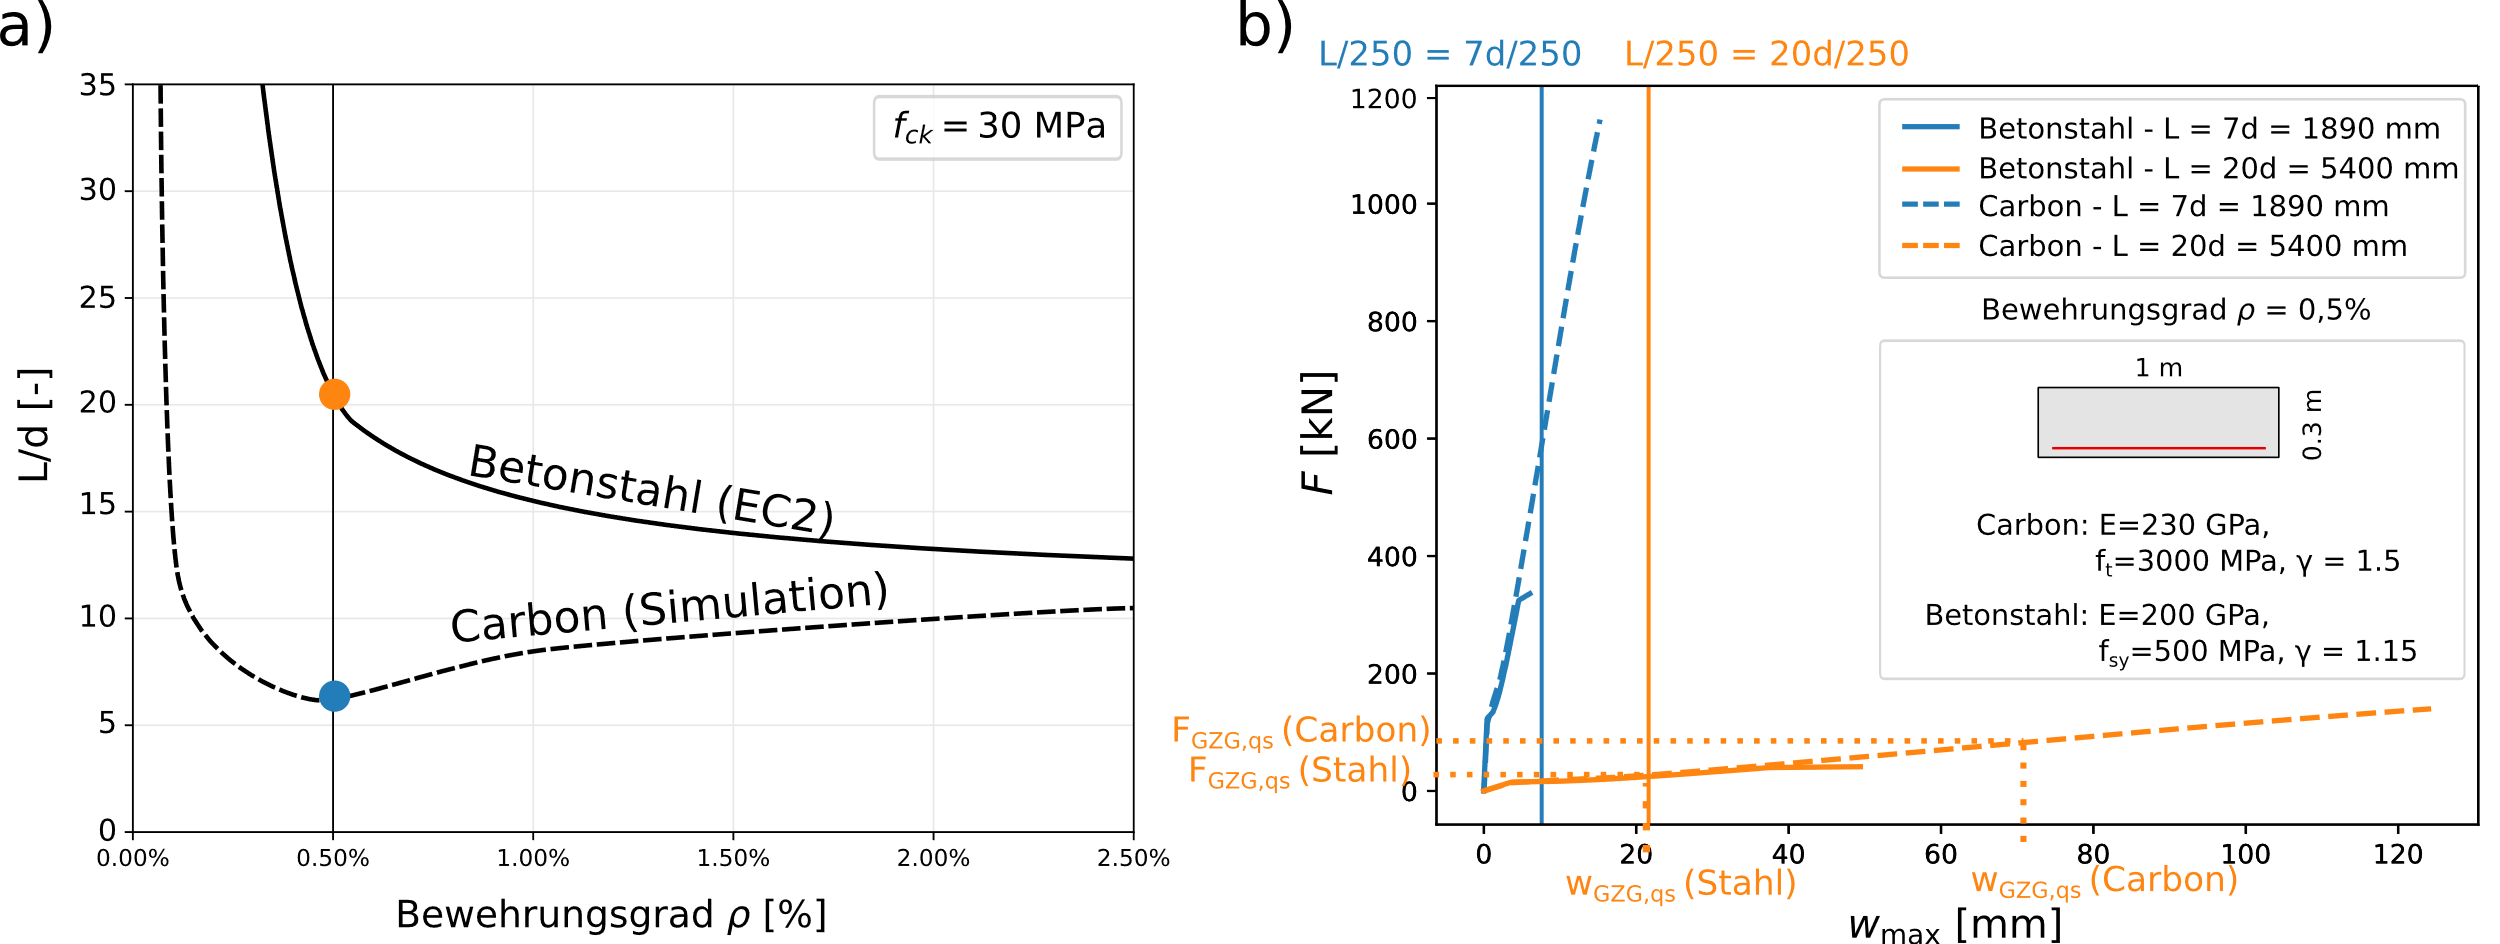

<div style="background-color:lightgray;text-align:left;width:45%;display:inline-table;"> <img src="../icons/previous.png" alt="Previous trip" width="50" height="50">
    &nbsp; <a href="../tour8_rcbeam/8_1_rc_beam_mkapa.ipynb#top">8.1 Nonlinear moment-curvature relationship</a> 
</div><div style="background-color:lightgray;text-align:center;width:10%;display:inline-table;"> <a href="#top"><img src="../icons/compass.png" alt="Compass" width="50" height="50"></a></div><div style="background-color:lightgray;text-align:right;width:45%;display:inline-table;"> 
    <a href="../tour8_rcbeam/8_3_rc_beam_deflection_pstudy.ipynb#top">8.3 Examples, Parametric studies</a>&nbsp; <img src="../icons/next.png" alt="Previous trip" width="50" height="50"> </div> 